In [1]:
import sys
sys.path.append("../src")

import torch
import road as rd
import network as nw
import initial_and_bc as ibc
import junction as jn

In [44]:
# Test if the scheme is conservative with only two roads in a circle
L = 25
N = 32

road_1 = rd.Road(4, L, N, Vmax=[torch.tensor(50.0/3.6)], control_points=[], periodic=False,
               initial=lambda x : torch.ones_like(x) * 0.6)
road_2 = rd.Road(4, L, N, Vmax=[torch.tensor(50.0/3.6)], control_points=[], periodic=False,
               initial=lambda x : torch.ones_like(x) * 0.2)

junction_1 = jn.Junction([road_1, road_2], [0], [1], [[1.0]], [], [])
junction_2 = jn.Junction([road_1, road_2], [1], [0], [[1.0]], [], [])

network = nw.RoadNetwork([road_1, road_2], [junction_1, junction_2], 1000, [], [])

In [45]:
densities, _, _, _ = network.solve_cons_law_conservative()

In [46]:
density_list = []
times = list(densities[0].keys())
for t in times:
    # print(f"t={t}")
    tot_densities = 0
    for _, rho in densities.items():
        tot_densities += torch.sum(rho[t][2:-2])
    density_list.append(tot_densities * road_1.dx)
    # print(f"Total densities: {tot_densities}")
    # print("------------------------\n")


4152
3.2052624


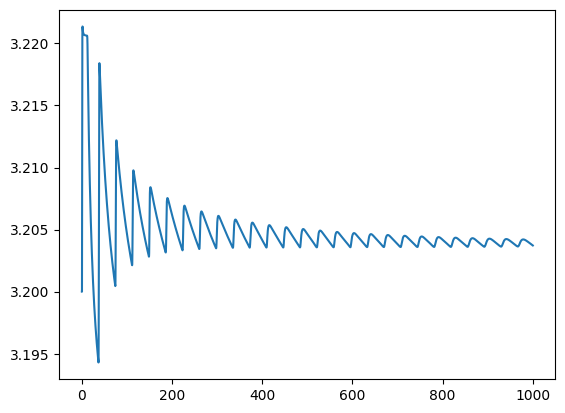

In [47]:
import matplotlib.pyplot as plt
import numpy as np
print(len(times))
print(np.mean(density_list))
plt.plot(times, density_list)

In [27]:
densities

{0: {0: tensor([0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000]),
  tensor(0.7500): tensor([0.4667, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.5833]),
  tensor(1.5000): tensor([0.3481, 0.5852, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.5947, 0.5720]),
  tensor(2.2500): tensor([0.2834, 0.5168, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.5999, 0.5991,
          0.5880, 0.5638]),
  tensor(3.0000): tensor([0.2570, 0.4156, 0.5989, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
          0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.5996, 0.5972